#Programación de PSA Andrés Alarcón Navarro

In [ ]:
# Instala SimpleAI
!pip install simpleai
!pip install pydot flask

# Crea un directorio para guardar las soluciones de los casos de manera ordenada
import os
# Directory
directory = "AllCases"
# Parent Directory path
parent_dir = "/content/"
# Path
path = os.path.join(parent_dir, directory)
os.mkdir(path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 898.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=100981 sha256=447d924a124169b6f2146284472c4a207e5b2fa18a63604f1e0e0beb102434e8
  Stored in directory: /root/.cache/pip/wheels/91/0c/38/421d7910e7bc59b97fc54f490808bdb1097607d83d1a592865
Successfully built simpleai


In [ ]:
#-------------------------------------------------------------------------------
#    Esqueleto de PSA para el problema de ...
#-------------------------------------------------------------------------------

from simpleai.search import SearchProblem, depth_first, breadth_first, uniform_cost, greedy, astar, limited_depth_first
from simpleai.search.viewers import BaseViewer, ConsoleViewer, WebViewer

#-------------------------------------------------------------------------------
#   Definición del problema
'''
Existen 16 casillas posibles para el caballo

El caballo debe viajar a todas las casillas ocupadas en los menores movimientos posibles

2 movimientos legales por esquina , hay 4 esquinas = 8
Esquinas opuestas comparten las mismas casillas legales
Todas las esquinas llevan al centro del tablero

3 movimientos legales en los laterales, hay 8 laterales = 24
Los laterales conducen a otros laterales y al centro
Son necesarios 3 movimientos para tocar una casilla adyacente


4 movimientos legales en el centro, hay 4 casillas centrales = 16

48 movimientos legales posibles

Debe llegar a cubrir las 16 casillas en la menor cantidad de movimientos posibles
Método de grapho, búsqueda de coste uniforme

Hay 3 transiciones

Centro:
4 nodos, 2 esquinas y 2 laterales
Esquina:
2 nodos, centro
Lateral:
3 nodos: 2 laterales y 1 centro

Siempre hay 4 movimientos máximos para volver a la casillas de incio
'''
#-------------------------------------------------------------------------------

class KnightMoves(SearchProblem):
    def __init__(self, posGoal):
        # Llama al constructor de su superclase SearchProblem (start = estado inicial).
        SearchProblem.__init__(self,posGoal)

    def actions(self, state):
        # Determina las acciones legales según el estado recibido y las precondiciones
        # de cada acción posible, para luego colocarlas en una lista de python
        # Regresa la lista de acciones legales del diccionario de casillas
        return list(casillas[state[0]])

    def result(self, state, action):
        #Convierte el estado a objetos mutables para poder revisar si ya llego a una casilla deseada,
        #así quitandola de la lista de su estado y actualizando la casilla a la que ira
        #Conviertiendo así la casilla que visita en su casilla actual de la siguiente iteración

        temp  = list(state)
        temp[1] = set(temp[1])

        if action in temp[1]:
            temp[1].remove(action)

        temp[0] = action

        #Regresa el estado actualizado en formato inmutable
        temp[1] = tuple(temp[1])
        temp = tuple(temp)
        return temp

    def is_goal(self,state):
        #Revisa si el elemento de casillas por visitar ya esa vacío, es decir,
        #ya llego al estado meta.

        return len(state[1]) == 0

    def cost(self, state, action, state2):
        #Regresa 1 para cada acción porque no se penaliza ninguna decisión particular.

        return 1

    def heuristic(self, state):
        # Estima de manera optimista, que el caballo se encuentra en una serie de movimientos
        #consecutivos hacia el estado meta, de modo que la heurística dice que tardara
        #al menos N movimientos en completar una lista de N casillas consecutivas.

        return len(state[1])

casillas = {
    #esquinas
    1: {10,7},
    16: {10,7},
    13: {6,11},
    4: {6,11},
    #Laterales
    2: {9,8,11},
    3: {5,10,12},
    5: {3,11,14},
    9: {2,7,15},
    12: {3,6,14},
    8: {2,10,15},
    15: {6,9,8},
    14: {5,7,12},
    #centro
    11: {5,2,4,13},
    7: {9,14,1,16},
    6: {12,15,13,4},
    10: {3,8,1,16},
}

In [ ]:
# Despliega la secuencia de estados y acciones obtenidas como resultado
def display(result):
    if result is not None:
        for i, (action, state) in enumerate(result.path()):
            if action == None:
                print('Estado inicial')
            elif i == len(result.path()) - 1:
                print(i,'- Después de la accion', action)
                print('¡Meta lograda con costo =', result.cost,'!')
            else:
                print(i,'- Después de la accion', action)

            print('  ', state)
    else:
        print('Falla: No se pudo resolver el problema')


#Ejecución sobre instancia 3 del problema
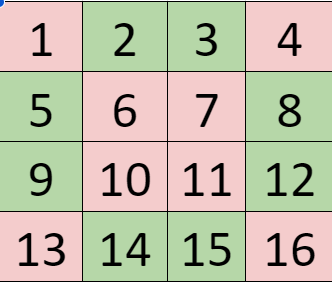
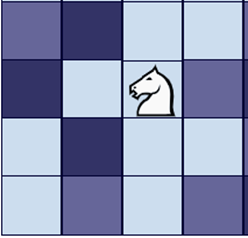

In [ ]:
#-------------------------------------------------------------------------------
#   Solución del problema con diferentes métodos
#-------------------------------------------------------------------------------

# posibles expectadores para las búsquedas
# my_viewer = None
my_viewer = BaseViewer()       # Solo estadísticas
# my_viewer = ConsoleViewer()    # Texto en la consola
#my_viewer = WebViewer()        # Abrir en un browser en la liga http://localhost:8000

# Crea PSAs y los resuelve usando una estrategia de búsqueda mediante
# un algoritmo seleccionado.

# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# primero en anchura
result = breadth_first(KnightMoves((7,(1,2,5,10,14,8,16))), graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda Primero en Anchura <<')
display(result)
# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)


>> Búsqueda Primero en Anchura <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 16
   (16, (1, 2, 5, 8, 10, 14))
2 - Después de la accion 10
   (10, (1, 2, 5, 8, 14))
3 - Después de la accion 8
   (8, (1, 2, 5, 14))
4 - Después de la accion 2
   (2, (1, 5, 14))
5 - Después de la accion 11
   (11, (1, 5, 14))
6 - Después de la accion 5
   (5, (1, 14))
7 - Después de la accion 14
   (14, (1,))
8 - Después de la accion 7
   (7, (1,))
9 - Después de la accion 1
¡Meta lograda con costo = 9 !
   (1, ())
Estadisticas:
{'max_fringe_size': 330, 'visited_nodes': 982, 'iterations': 982}


In [ ]:
my_viewer.create_graph('png',r"/content/Anchura.png")

In [ ]:
# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# primero en profundidad
my_viewer = BaseViewer()
result = depth_first(KnightMoves((7,(1,2,5,10,14,8,16))), graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda Primero en Profundidad <<')
display(result)

# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)


>> Búsqueda Primero en Profundidad <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 1
   (1, (2, 5, 8, 10, 14, 16))
2 - Después de la accion 7
   (7, (2, 5, 8, 10, 14, 16))
3 - Después de la accion 14
   (14, (2, 5, 8, 10, 16))
4 - Después de la accion 7
   (7, (2, 5, 8, 10, 16))
5 - Después de la accion 1
   (1, (2, 5, 8, 10, 16))
6 - Después de la accion 10
   (10, (2, 5, 8, 16))
7 - Después de la accion 16
   (16, (8, 2, 5))
8 - Después de la accion 7
   (7, (8, 2, 5))
9 - Después de la accion 14
   (14, (8, 2, 5))
10 - Después de la accion 5
   (5, (8, 2))
11 - Después de la accion 14
   (14, (8, 2))
12 - Después de la accion 7
   (7, (8, 2))
13 - Después de la accion 1
   (1, (8, 2))
14 - Después de la accion 10
   (10, (8, 2))
15 - Después de la accion 8
   (8, (2,))
16 - Después de la accion 2
¡Meta lograda con costo = 16 !
   (2, ())
Estadisticas:
{'max_fringe_size': 30, 'visited_nodes': 32, 'iterations': 32}


In [ ]:
my_viewer.create_graph('png',r"/content/Profunidad.png")

In [ ]:
# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# costo uniforme
my_viewer = BaseViewer()
result = uniform_cost(KnightMoves((7,(1,2,5,10,14,8,16))), graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda de costo uniforme <<')
display(result)

# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)


>> Búsqueda de costo uniforme <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 1
   (1, (2, 5, 8, 10, 14, 16))
2 - Después de la accion 10
   (10, (2, 5, 8, 14, 16))
3 - Después de la accion 8
   (8, (2, 5, 14, 16))
4 - Después de la accion 2
   (2, (16, 5, 14))
5 - Después de la accion 11
   (11, (16, 5, 14))
6 - Después de la accion 5
   (5, (16, 14))
7 - Después de la accion 14
   (14, (16,))
8 - Después de la accion 7
   (7, (16,))
9 - Después de la accion 16
¡Meta lograda con costo = 9 !
   (16, ())
Estadisticas:
{'max_fringe_size': 346, 'visited_nodes': 1163, 'iterations': 1163}


In [ ]:
my_viewer.create_graph('png',r"/content/CUniforme.png")

In [ ]:
# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# profunidad limitada

my_viewer = BaseViewer()
result = limited_depth_first(KnightMoves((7,(1,2,5,10,14,8,16))), 15,graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda de profunidad limitada <<')
display(result)

# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)


>> Búsqueda de profunidad limitada <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 1
   (1, (2, 5, 8, 10, 14, 16))
2 - Después de la accion 7
   (7, (2, 5, 8, 10, 14, 16))
3 - Después de la accion 14
   (14, (2, 5, 8, 10, 16))
4 - Después de la accion 7
   (7, (2, 5, 8, 10, 16))
5 - Después de la accion 1
   (1, (2, 5, 8, 10, 16))
6 - Después de la accion 10
   (10, (2, 5, 8, 16))
7 - Después de la accion 16
   (16, (8, 2, 5))
8 - Después de la accion 7
   (7, (8, 2, 5))
9 - Después de la accion 14
   (14, (8, 2, 5))
10 - Después de la accion 5
   (5, (8, 2))
11 - Después de la accion 14
   (14, (8, 2))
12 - Después de la accion 7
   (7, (8, 2))
13 - Después de la accion 9
   (9, (8, 2))
14 - Después de la accion 2
   (2, (8,))
15 - Después de la accion 8
¡Meta lograda con costo = 15 !
   (8, ())
Estadisticas:
{'max_fringe_size': 23, 'visited_nodes': 24, 'iterations': 24}


In [ ]:
my_viewer.create_graph('png',r"/content/PLimitada.png")

In [ ]:
# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# A*. Ojo: equiere tener difinida la heurística
my_viewer = BaseViewer()
result = astar(KnightMoves((7,(1,2,5,10,14,8,16))), graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda A* <<')
display(result)

# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)



>> Búsqueda A* <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 1
   (1, (2, 5, 8, 10, 14, 16))
2 - Después de la accion 7
   (7, (2, 5, 8, 10, 14, 16))
3 - Después de la accion 16
   (16, (2, 5, 8, 10, 14))
4 - Después de la accion 10
   (10, (2, 5, 8, 14))
5 - Después de la accion 8
   (8, (2, 5, 14))
6 - Después de la accion 2
   (2, (5, 14))
7 - Después de la accion 11
   (11, (5, 14))
8 - Después de la accion 5
   (5, (14,))
9 - Después de la accion 14
¡Meta lograda con costo = 9 !
   (14, ())
Estadisticas:
{'max_fringe_size': 147, 'visited_nodes': 109, 'iterations': 109}


In [ ]:
my_viewer.create_graph('png',r"/content/AEstrella.png")

In [ ]:
# resuelve el problema utilizando búsqueda de grafo con el algoritmo de
# greedy Ojo: equiere tener difinida la heurística

my_viewer = BaseViewer()
result = greedy(KnightMoves((7,(1,2,5,10,14,8,16))), graph_search=True, viewer=my_viewer)
print()
print('>> Búsqueda Greedy <<')
display(result)

# despliega las estadísticas de búsqueda si no se seleccionó un espectador
if my_viewer != None:
    print('Estadisticas:')
    print(my_viewer.stats)



>> Búsqueda Greedy <<
Estado inicial
   (7, (1, 2, 5, 10, 14, 8, 16))
1 - Después de la accion 16
   (16, (1, 2, 5, 8, 10, 14))
2 - Después de la accion 10
   (10, (1, 2, 5, 8, 14))
3 - Después de la accion 8
   (8, (1, 2, 5, 14))
4 - Después de la accion 2
   (2, (1, 5, 14))
5 - Después de la accion 11
   (11, (1, 5, 14))
6 - Después de la accion 5
   (5, (1, 14))
7 - Después de la accion 14
   (14, (1,))
8 - Después de la accion 7
   (7, (1,))
9 - Después de la accion 1
¡Meta lograda con costo = 9 !
   (1, ())
Estadisticas:
{'max_fringe_size': 22, 'visited_nodes': 13, 'iterations': 13}


In [ ]:
my_viewer.create_graph('png',r"/content/Greedy.png")

#Resolución de 3 casos con los respectivos 6 métodos de búsqueda
Métodós de búsqueda ciega:
- Primero en anchura
- Primero en profunidad
- Costo uniforme
- Primero en Profundidad Limitada

Métodós de búsqueda informada:
- A*
- Greedy (Codicioso)

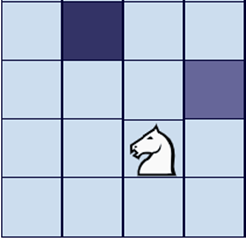
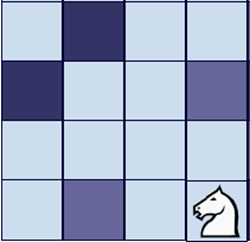
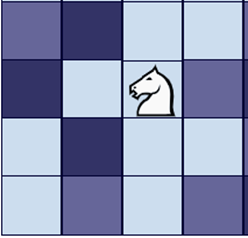

In [ ]:
#Caracteriza los tres problemas para el caballo
cases = [(11,(2,8)),(16,(14,5,2,8)),(7,(1,2,5,10,14,8,16))]
#Métodos de búsqueda a ejecutar
methods = ['breadth_first','depth_first','uniform_cost','limited_depth_first','astar','greedy']
#Iteraciones sobre cada caso para los 6 métodos
for index,case1 in enumerate(cases):
  for method in methods:
    my_viewer = BaseViewer()
    if method == 'limited_depth_first':
    #Este método requiere la cantidad de niveles de profunidad por lo que se agrega la validación
      result = eval(method)(KnightMoves(case1), 15,graph_search=True, viewer=my_viewer)
    else:
      result = eval(method)(KnightMoves(case1), graph_search=True, viewer=my_viewer)
    print()
    print('>> Búsqueda',method,'Caso',index+1,' <<')
    display(result)
    if my_viewer != None:
      print('Estadisticas:')
      print(my_viewer.stats)
    #Guarda las soluciones que encuentra en la carpeta AllCases para revisar la solución
    my_viewer.create_graph('png',f"/content/AllCases/{method.capitalize()}_Case_{index+1}.png")


>> Búsqueda breadth_first Caso 1  <<
Estado inicial
   (11, (2, 8))
1 - Después de la accion 2
   (2, (8,))
2 - Después de la accion 8
¡Meta lograda con costo = 2 !
   (8, ())
Estadisticas:
{'max_fringe_size': 8, 'visited_nodes': 6, 'iterations': 6}

>> Búsqueda depth_first Caso 1  <<
Estado inicial
   (11, (2, 8))
1 - Después de la accion 13
   (13, (8, 2))
2 - Después de la accion 6
   (6, (8, 2))
3 - Después de la accion 15
   (15, (8, 2))
4 - Después de la accion 8
   (8, (2,))
5 - Después de la accion 2
¡Meta lograda con costo = 5 !
   (2, ())
Estadisticas:
{'max_fringe_size': 14, 'visited_nodes': 27, 'iterations': 27}

>> Búsqueda uniform_cost Caso 1  <<
Estado inicial
   (11, (2, 8))
1 - Después de la accion 2
   (2, (8,))
2 - Después de la accion 8
¡Meta lograda con costo = 2 !
   (8, ())
Estadisticas:
{'max_fringe_size': 10, 'visited_nodes': 12, 'iterations': 12}

>> Búsqueda limited_depth_first Caso 1  <<
Estado inicial
   (11, (2, 8))
1 - Después de la accion 13
   (13, (8,

In [ ]:
# !npm install -g localtunnel
# from simpleai.search.viewers import WebViewer
# my_viewer = WebViewer()
# !curl https://loca.lt/mytunnelpassword
# print('')
# !lt --port 8000